<a href="https://colab.research.google.com/github/Novita20/machine-learning-ti3f/blob/main/Quiz_1_Novita_Dwi_Rahmadani_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **23. Novita Dwi Rahmadani / TI-3F /
 (2141720050)**


**SOAL 1 : Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# metrics accuracy with multinominal naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser="auto", as_frame=False)


In [3]:

# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

# Mengambil data dan target dari dataset MNIST
X, y = mnist.data, mnist.target

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
unique_labels, count = np.unique(y, return_counts=True)

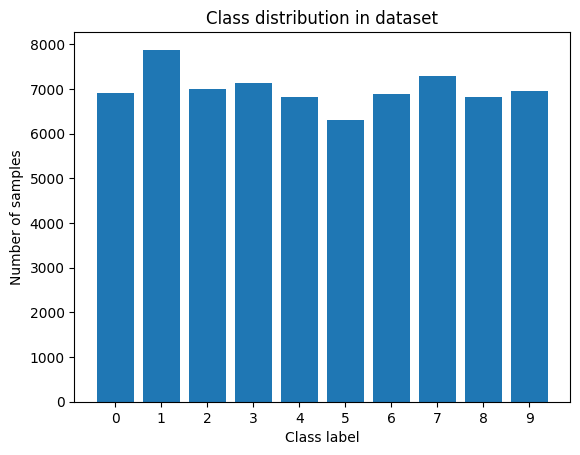

In [5]:

plt.bar(unique_labels, count)
plt.xlabel("Class label")
plt.ylabel("Number of samples")
plt.title("Class distribution in dataset")
plt.show()

In [6]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:

# Create RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [8]:

# Fit and transform the training set
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [9]:
# Train KNN classifier on the balanced sample of the training set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.96      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



**SOAL 2 : Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.**

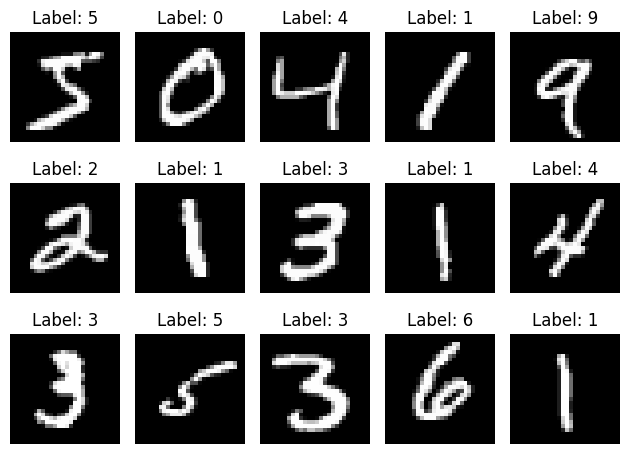

In [10]:

# Menampilkan 15 gambar pertama beserta labelnya
num_images_to_show = 15
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**SOAL 3 : Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk**

*   Langsung menggunakan nilai asli dari
citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
*   Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.






In [11]:

# Pilih 5 citra untuk dihitung histogramnya
num_display = 5

In [12]:

# menghitung histogram untuk 5 citra pertama
histograms = np.array([np.histogram(image.reshape(28, 28),
 bins=256, range=(0, 256))[0] for image in X[:num_display]])


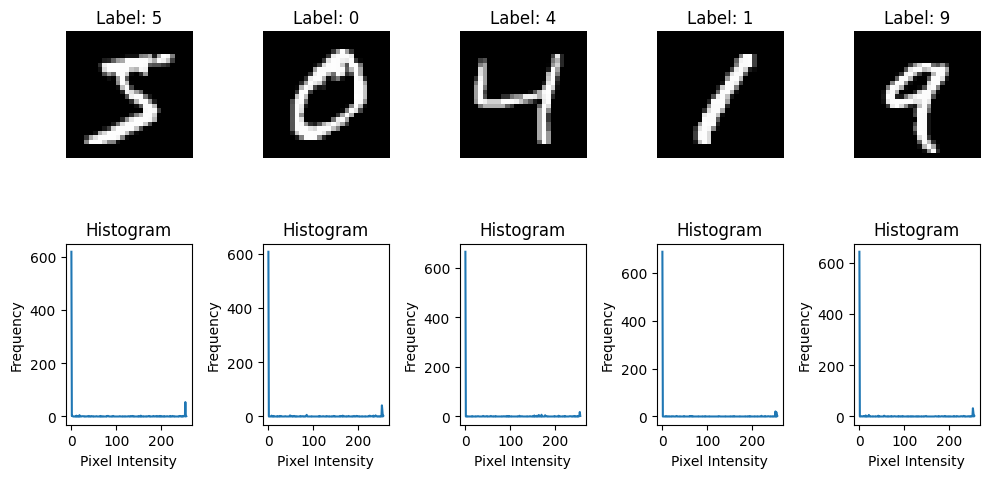

In [13]:

# membuat size canvas
plt.figure(figsize=(10, 7))

for i in range(num_display):
    plt.subplot(3, num_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_display, num_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**SOAL 4 : Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.**

In [14]:

# Rasio 70:30
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Cek ukuran data
print("Ukuran data training dan testing (70:30):")
print("Data training:", x_train_70.shape, y_train_70.shape)
print("Data testing:", x_test_70.shape, y_test_70.shape)

print("\nUkuran data training dan testing (80:20):")
print("Data training:", x_train_80.shape, y_train_80.shape)
print("Data testing:", x_test_80.shape, y_test_80.shape)

print("\nUkuran data training dan testing (90:10):")
print("Data training:", x_train_90.shape, y_train_90.shape)
print("Data testing:", x_test_90.shape, y_test_90.shape)

Ukuran data training dan testing (70:30):
Data training: (49000, 784) (49000,)
Data testing: (21000, 784) (21000,)

Ukuran data training dan testing (80:20):
Data training: (56000, 784) (56000,)
Data testing: (14000, 784) (14000,)

Ukuran data training dan testing (90:10):
Data training: (63000, 784) (63000,)
Data testing: (7000, 784) (7000,)


**SOAL 5 : Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.**


*   Anda diperbolehkan untuk melakukan tunning parameter.
*   Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [15]:

# Import SVM classifier
from sklearn.svm import SVC
# Create SVC object and call fit function to train model
clf = SVC(kernel='linear')
clf.fit(x_test_70, y_test_70)

SVC(kernel='linear')

In [ ]:

# Show accuracy score
clf.score(x_test_70, y_test_70)

**SOAL 6 : Evaluasi model yang Anda buat terhadap data training dan data testing.**


*   Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
*   Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
*   Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.


In [16]:

# inisialisai multinominal
mnb = MultinomialNB()

# fit model
mnb.fit(x_train_70, y_train_70)
mnb.fit(x_test_70, y_test_70)

# prediksi dengan data training
y_pred_train = mnb.predict(x_train_70)
y_pred_test = mnb.predict(x_test_70)

# Evaluasi akurasi data train dan test
acc_train = accuracy_score(y_train_70, y_pred_train)
acc_test = accuracy_score(y_test_70, y_pred_test)

# print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8256122448979591
Hasil akurasi data test: 0.8263333333333334


In [17]:

report_train = classification_report(y_train_70, y_pred_train)
report_test = classification_report(y_test_70, y_pred_test)

# print hasil evaluasi
print(f'Hasil klrifikasi report data train: \n{report_train}')
print(f'Hasil klrifikasi report data test: \n{report_test}')

Hasil klrifikasi report data train: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4845
           1       0.89      0.93      0.91      5513
           2       0.88      0.83      0.85      4857
           3       0.80      0.81      0.81      4965
           4       0.82      0.74      0.78      4888
           5       0.85      0.67      0.75      4398
           6       0.88      0.91      0.90      4788
           7       0.94      0.82      0.88      5045
           8       0.65      0.78      0.71      4833
           9       0.69      0.83      0.75      4868

    accuracy                           0.83     49000
   macro avg       0.83      0.82      0.82     49000
weighted avg       0.83      0.83      0.83     49000

Hasil klrifikasi report data test: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2058
           1       0.89      0.93      0.91      2364
     

In [19]:

# bentuk confusion matrix train and test
mat_train = confusion_matrix(y_train_70, y_pred_train)
mat_test = confusion_matrix(y_test_70, y_pred_test)

Text(113.9222222222222, 0.5, 'Prekdiksi label Train')

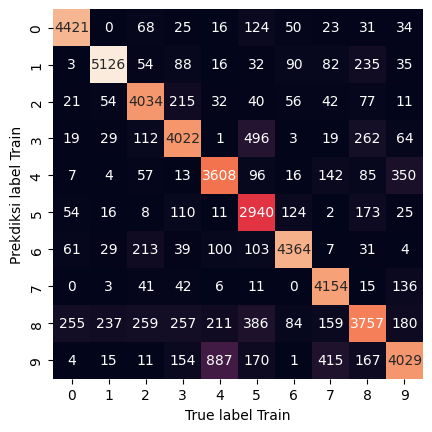

In [20]:

sns.heatmap(mat_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Train')
plt.ylabel('Prekdiksi label Train')


Text(113.9222222222222, 0.5, 'Prekdiksi label Test')

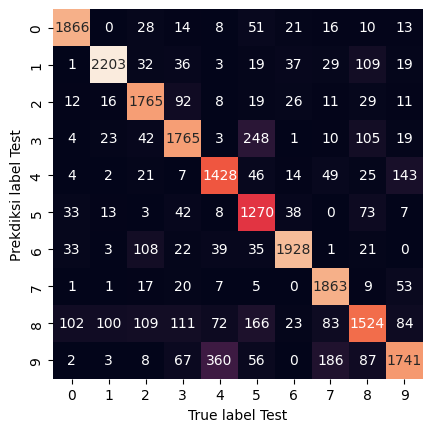

In [21]:

sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prekdiksi label Test')

**SOAL 7 : Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.**

In [22]:

import pandas as pd

# jumlah sample yang akan ditampilkan
n_samples = 60

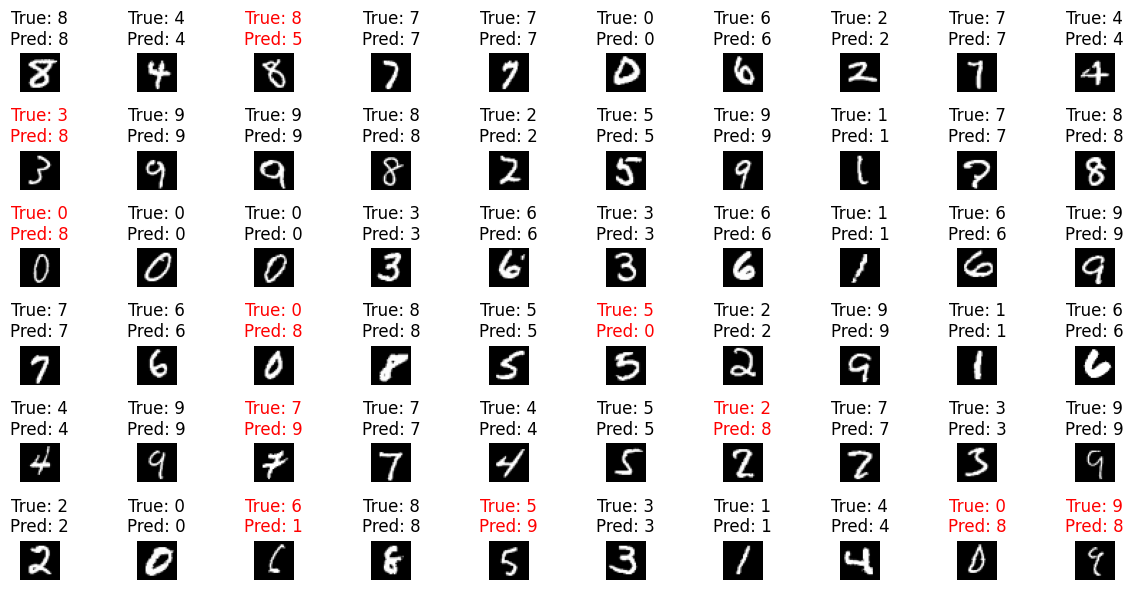

In [23]:
# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_70[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

**SOAL 8 : Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!**

In [24]:

# Prediksi model SVM
test_preds_svm = clf.predict(X_test)

# Prediksi model Naive Bayes
test_preds_nb = mnb.predict(x_test_70)

# Hitung akurasi
svm_accuracy = accuracy_score(y_test, test_preds_svm)
nb_accuracy = accuracy_score(y_test_70, test_preds_nb)

print(f'Akurasi SVM: {svm_accuracy * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy * 100:.2f}%')

Akurasi SVM: 100.00%
Akurasi Naive Bayes: 82.63%


Penjelasan : Jadi model terbaik adalag SVM dengan tikat akurasi mencapai 100%. Konfigurasi model SVM yang digunakan disini adalah dengan kernel linier dalam arti SVM mencoba membuat pemisahan linier anatara kelas-kelas dalam data. Untuk tingkat akurasinya SVM sebesar 100.00% pada tingkat testing, sedangkan Naive Bayes memiliki tingkat akurasi 82.63%.